In [319]:
import pandas as pd

df = pd.read_csv('player_data2888.csv')
df.head(15)

,player_id,frame_num,bbox_x1,bbox_y1,bbox_x2,bbox_y2,position_x,position_y,team_color,team,confidence,ball_pos_x,ball_pos_y
0,1,0,852.499329,633.650208,898.424744,719.967773,875,719,[ 141.53 228.33 182],2,NaN,1195.0,857.0
1,2,0,535.304871,686.074402,577.785889,784.134155,556,784,[ 141.53 228.33 182],2,NaN,1195.0,857.0
2,3,0,328.786926,492.236053,362.847198,568.661682,345,568,[ 141.53 228.33 182],2,NaN,1195.0,857.0
3,4,0,996.387695,453.007080,1026.880737,526.036194,1011,526,[ 141.53 228.33 182],2,NaN,1195.0,857.0
4,5,0,222.672455,512.682922,255.082397,594.982422,238,594,[ 227.57 228.08 218.05],1,NaN,1195.0,857.0
5,6,0,360.154938,721.563538,394.178558,824.180969,377,824,[ 227.57 228.08 218.05],1,NaN,1195.0,857.0
6,7,0,1278.082153,390.203888,1306.076416,461.995056,1292,461,[ 141.53 228.33 182],2,NaN,1195.0,857.0
7,8,0,1310.292847,445.095703,1350.578247,516.395325,1330,516,[ 141.53 228.33 182],2,NaN,1195.0,857.0
8,9,0,374.092041,304.865479,399.891083,366.140076,386,366,[ 227.57 228.08 218.05],1,NaN,1195.0,857.0
9,10,0,1369.366943,813.086975,1444.322632,904.287781,1406,904,[ 227.57 228.08 218.05],1,NaN,1195.0,857.0


In [320]:
def get_zone(x, team):
    if team == 2:  # Green team
        if 700>x >400:  # Adjusted defense zone for green team
            return 'defense'
        elif 700 <= x <= 1200:  # Adjusted midfield zone for green team
            return 'midfield'
        else:  # x > 650
            return 'attack'
    else:  # White team
        if 300<x<700:  # Adjusted defense zone for white team
            return 'defense'
        elif 700 <= x <= 1200:  # Adjusted midfield zone for white team
            return 'midfield'
        else:  # x < 350
            return 'attack'



df['zone'] = df.apply(lambda row: get_zone(row['position_x'], row['team']), axis=1)
df.head(10)


,player_id,frame_num,bbox_x1,bbox_y1,bbox_x2,bbox_y2,position_x,position_y,team_color,team,confidence,ball_pos_x,ball_pos_y,zone
0,1,0,852.499329,633.650208,898.424744,719.967773,875,719,[ 141.53 228.33 182],2,NaN,1195.0,857.0,midfield
1,2,0,535.304871,686.074402,577.785889,784.134155,556,784,[ 141.53 228.33 182],2,NaN,1195.0,857.0,defense
2,3,0,328.786926,492.236053,362.847198,568.661682,345,568,[ 141.53 228.33 182],2,NaN,1195.0,857.0,attack
3,4,0,996.387695,453.007080,1026.880737,526.036194,1011,526,[ 141.53 228.33 182],2,NaN,1195.0,857.0,midfield
4,5,0,222.672455,512.682922,255.082397,594.982422,238,594,[ 227.57 228.08 218.05],1,NaN,1195.0,857.0,attack
5,6,0,360.154938,721.563538,394.178558,824.180969,377,824,[ 227.57 228.08 218.05],1,NaN,1195.0,857.0,defense
6,7,0,1278.082153,390.203888,1306.076416,461.995056,1292,461,[ 141.53 228.33 182],2,NaN,1195.0,857.0,attack
7,8,0,1310.292847,445.095703,1350.578247,516.395325,1330,516,[ 141.53 228.33 182],2,NaN,1195.0,857.0,attack
8,9,0,374.092041,304.865479,399.891083,366.140076,386,366,[ 227.57 228.08 218.05],1,NaN,1195.0,857.0,defense
9,10,0,1369.366943,813.086975,1444.322632,904.287781,1406,904,[ 227.57 228.08 218.05],1,NaN,1195.0,857.0,attack


In [321]:
zone_counts = df.groupby(['player_id', 'zone']).size().unstack(fill_value=0)
zone_counts['total'] = zone_counts.sum(axis=1)

# Calculer les pourcentages
zone_percentages = zone_counts.div(zone_counts['total'], axis=0) * 100

# Afficher pour le joueur 1
print(zone_percentages.loc[4])


zone
attack        5.610098
defense       0.000000
midfield     94.389902
total       100.000000
Name: 4, dtype: float64


In [322]:
def classify_player(row):
    return row[['defense', 'midfield', 'attack']].idxmax()


zone_percentages['dominant_zone'] = zone_percentages.apply(classify_player, axis=1)
zone_percentages



zone,attack,defense,midfield,total,dominant_zone
player_id,,,,,
1,12.931034,1.939655,85.129310,100.0,midfield
2,13.629160,86.370840,0.000000,100.0,defense
3,39.054054,41.621622,19.324324,100.0,defense
4,5.610098,0.000000,94.389902,100.0,midfield
5,28.360215,56.854839,14.784946,100.0,defense
6,13.458950,86.541050,0.000000,100.0,defense
7,100.000000,0.000000,0.000000,100.0,attack
8,89.858012,9.127789,1.014199,100.0,attack
9,28.685259,39.442231,31.872510,100.0,defense


In [323]:
# On part du DataFrame de positions et celui des zones dominantes
merged_df = df.merge(zone_percentages, on='player_id', how='left')
merged_df.head()



,player_id,frame_num,bbox_x1,bbox_y1,bbox_x2,bbox_y2,position_x,position_y,team_color,team,confidence,ball_pos_x,ball_pos_y,zone,attack,defense,midfield,total,dominant_zone
0,1,0,852.499329,633.650208,898.424744,719.967773,875,719,[ 141.53 228.33 182],2,NaN,1195.0,857.0,midfield,12.931034,1.939655,85.129310,100.0,midfield
1,2,0,535.304871,686.074402,577.785889,784.134155,556,784,[ 141.53 228.33 182],2,NaN,1195.0,857.0,defense,13.629160,86.370840,0.000000,100.0,defense
2,3,0,328.786926,492.236053,362.847198,568.661682,345,568,[ 141.53 228.33 182],2,NaN,1195.0,857.0,attack,39.054054,41.621622,19.324324,100.0,defense
3,4,0,996.387695,453.007080,1026.880737,526.036194,1011,526,[ 141.53 228.33 182],2,NaN,1195.0,857.0,midfield,5.610098,0.000000,94.389902,100.0,midfield
4,5,0,222.672455,512.682922,255.082397,594.982422,238,594,[ 227.57 228.08 218.05],1,NaN,1195.0,857.0,attack,28.360215,56.854839,14.784946,100.0,defense


In [324]:
merged_df[merged_df['dominant_zone'] == 'attack']['player_id'].nunique()



9

In [325]:
merged_df[merged_df['dominant_zone'] == 'defense']['player_id'].nunique()


6

In [326]:
merged_df[merged_df['dominant_zone'] == 'midfield']['player_id'].nunique()

7

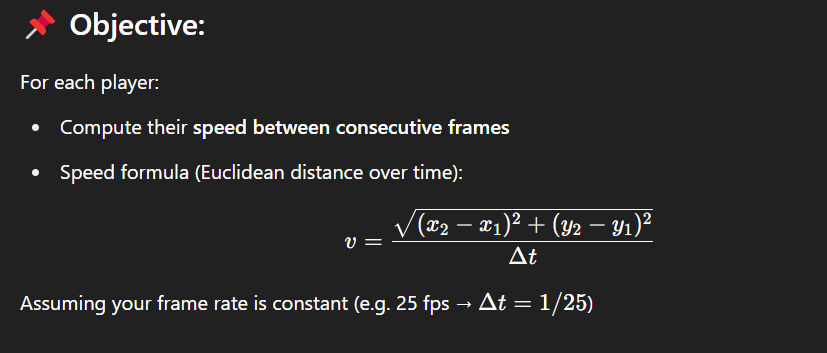

In [327]:
merged_df = merged_df.sort_values(by=['player_id', 'frame_num']).reset_index(drop=True)

merged_df

,player_id,frame_num,bbox_x1,bbox_y1,bbox_x2,bbox_y2,position_x,position_y,team_color,team,confidence,ball_pos_x,ball_pos_y,zone,attack,defense,midfield,total,dominant_zone
0,1,0,852.499329,633.650208,898.424744,719.967773,875,719,[ 141.53 228.33 182],2,NaN,1195.0,857.0,midfield,12.931034,1.939655,85.129310,100.0,midfield
1,1,1,852.492188,633.639465,898.464844,719.968506,875,719,[ 141.53 228.33 182],2,NaN,1195.0,857.0,midfield,12.931034,1.939655,85.129310,100.0,midfield
2,1,2,861.550232,634.609375,904.032166,723.643677,882,723,[ 141.53 228.33 182],2,NaN,NaN,NaN,midfield,12.931034,1.939655,85.129310,100.0,midfield
3,1,3,872.893433,637.160156,908.789062,724.422180,890,724,[ 141.53 228.33 182],2,NaN,1207.0,867.0,midfield,12.931034,1.939655,85.129310,100.0,midfield
4,1,4,880.807495,639.302429,914.285217,723.016052,897,723,[ 141.53 228.33 182],2,NaN,1212.0,871.0,midfield,12.931034,1.939655,85.129310,100.0,midfield
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13490,22,745,1369.353760,471.020233,1400.570068,528.048157,1384,528,[ 227.57 228.08 218.05],1,NaN,NaN,NaN,attack,65.139442,0.000000,34.860558,100.0,attack
13491,22,746,1370.637573,471.625031,1403.629517,529.413818,1387,529,[ 227.57 228.08 218.05],1,NaN,NaN,NaN,attack,65.139442,0.000000,34.860558,100.0,attack
13492,22,747,1372.499390,472.387878,1405.814575,528.831299,1389,528,[ 227.57 228.08 218.05],1,NaN,NaN,NaN,attack,65.139442,0.000000,34.860558,100.0,attack
13493,22,748,1376.767578,473.970001,1405.663086,528.256165,1391,528,[ 227.57 228.08 218.05],1,NaN,NaN,NaN,attack,65.139442,0.000000,34.860558,100.0,attack


In [328]:
# Compute difference between successive positions per player
merged_df['prev_x'] = merged_df.groupby('player_id')['position_x'].shift(1)
merged_df['prev_y'] = merged_df.groupby('player_id')['position_y'].shift(1)
merged_df['prev_frame'] = merged_df.groupby('player_id')['frame_num'].shift(1)
merged_df



,player_id,frame_num,bbox_x1,bbox_y1,bbox_x2,bbox_y2,position_x,position_y,team_color,team,...,ball_pos_y,zone,attack,defense,midfield,total,dominant_zone,prev_x,prev_y,prev_frame
0,1,0,852.499329,633.650208,898.424744,719.967773,875,719,[ 141.53 228.33 182],2,...,857.0,midfield,12.931034,1.939655,85.129310,100.0,midfield,NaN,NaN,NaN
1,1,1,852.492188,633.639465,898.464844,719.968506,875,719,[ 141.53 228.33 182],2,...,857.0,midfield,12.931034,1.939655,85.129310,100.0,midfield,875.0,719.0,0.0
2,1,2,861.550232,634.609375,904.032166,723.643677,882,723,[ 141.53 228.33 182],2,...,NaN,midfield,12.931034,1.939655,85.129310,100.0,midfield,875.0,719.0,1.0
3,1,3,872.893433,637.160156,908.789062,724.422180,890,724,[ 141.53 228.33 182],2,...,867.0,midfield,12.931034,1.939655,85.129310,100.0,midfield,882.0,723.0,2.0
4,1,4,880.807495,639.302429,914.285217,723.016052,897,723,[ 141.53 228.33 182],2,...,871.0,midfield,12.931034,1.939655,85.129310,100.0,midfield,890.0,724.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13490,22,745,1369.353760,471.020233,1400.570068,528.048157,1384,528,[ 227.57 228.08 218.05],1,...,NaN,attack,65.139442,0.000000,34.860558,100.0,attack,1382.0,527.0,744.0
13491,22,746,1370.637573,471.625031,1403.629517,529.413818,1387,529,[ 227.57 228.08 218.05],1,...,NaN,attack,65.139442,0.000000,34.860558,100.0,attack,1384.0,528.0,745.0
13492,22,747,1372.499390,472.387878,1405.814575,528.831299,1389,528,[ 227.57 228.08 218.05],1,...,NaN,attack,65.139442,0.000000,34.860558,100.0,attack,1387.0,529.0,746.0
13493,22,748,1376.767578,473.970001,1405.663086,528.256165,1391,528,[ 227.57 228.08 218.05],1,...,NaN,attack,65.139442,0.000000,34.860558,100.0,attack,1389.0,528.0,747.0


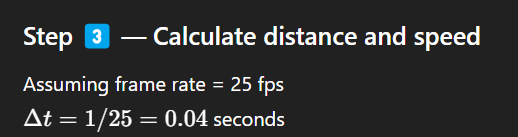

In [329]:
import math 
import numpy as np
# Frame difference
merged_df['frame_diff'] = merged_df['frame_num'] - merged_df['prev_frame']

# Euclidean distance (only where frame_diff is 1)
merged_df['distance'] = np.sqrt(
    (merged_df['position_x'] - merged_df['prev_x'])**2 + 
    (merged_df['position_y'] - merged_df['prev_y'])**2
)

# Speed = distance / delta_time (only where frame_diff is 1)
frame_rate = 25
merged_df['speed'] = merged_df['distance'] / (merged_df['frame_diff'] / frame_rate)

# Optional: replace speed where frame_diff != 1 with NaN (if discontinuities)
merged_df.loc[merged_df['frame_diff'] != 1, 'speed'] = np.nan





# Conversion des distances de pixels en mètres
pixels_per_meter = 100  # Exemple, 1 mètre = 100 pixels
merged_df['distance_meters'] = merged_df['distance'] / pixels_per_meter

# Calcul de la vitesse en mètres par seconde
merged_df['speed_mps'] = merged_df['distance_meters'] / (merged_df['frame_diff'] / frame_rate)



In [330]:
merged_df.head()


,player_id,frame_num,bbox_x1,bbox_y1,bbox_x2,bbox_y2,position_x,position_y,team_color,team,...,total,dominant_zone,prev_x,prev_y,prev_frame,frame_diff,distance,speed,distance_meters,speed_mps
0,1,0,852.499329,633.650208,898.424744,719.967773,875,719,[ 141.53 228.33 182],2,...,100.0,midfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,852.492188,633.639465,898.464844,719.968506,875,719,[ 141.53 228.33 182],2,...,100.0,midfield,875.0,719.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000
2,1,2,861.550232,634.609375,904.032166,723.643677,882,723,[ 141.53 228.33 182],2,...,100.0,midfield,875.0,719.0,1.0,1.0,8.062258,201.556444,0.080623,2.015564
3,1,3,872.893433,637.160156,908.789062,724.422180,890,724,[ 141.53 228.33 182],2,...,100.0,midfield,882.0,723.0,2.0,1.0,8.062258,201.556444,0.080623,2.015564
4,1,4,880.807495,639.302429,914.285217,723.016052,897,723,[ 141.53 228.33 182],2,...,100.0,midfield,890.0,724.0,3.0,1.0,7.071068,176.776695,0.070711,1.767767


# detecter les joueurs on the pitch

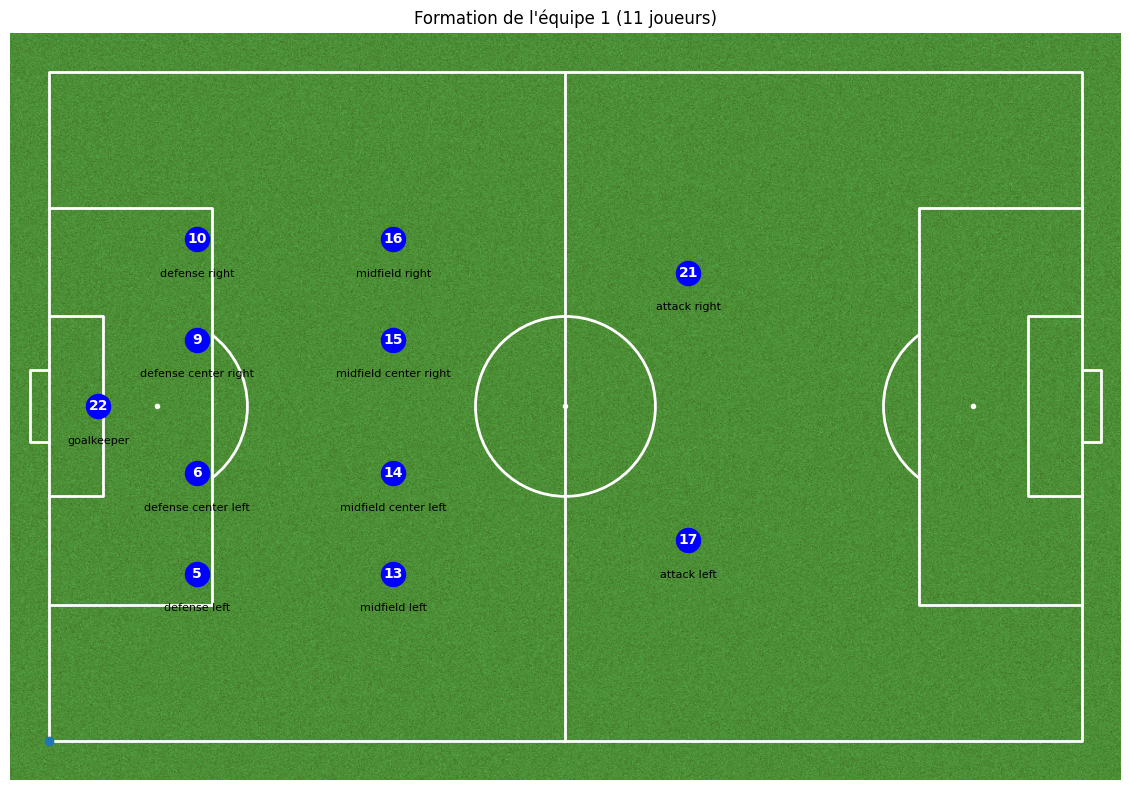

In [331]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle, Circle, Arc
from mplsoccer import Pitch

# Configuration du terrain
PITCH_LENGTH = 105
PITCH_WIDTH = 68

def draw_pitch():
    """Dessine un terrain de football avec la bibliothèque mplsoccer"""
    # Créer un terrain standard
    pitch = Pitch(pitch_type='uefa',  # Style UEFA standard
                  pitch_color='grass',  # Fond vert gazon
                  line_color='white',   # Lignes blanches
                  linewidth=2,
                  goal_type='box')      # Style des buts
    
    # Initialiser la figure
    fig, ax = pitch.draw(figsize=(12, 8))
    
    # Ajouter les éléments optionnels
    pitch.scatter(0, 0, ax=ax)  # Ceci est juste pour activer l'affichage
    
    return fig, ax

def assign_standard_positions(team_df, formation='4-4-2'):
    """Assigner des positions standard selon la formation"""
    positions = []
    
    if formation == '4-4-2':
        # Défenseurs (4)
        positions.extend(['defense_left', 'defense_center_left', 'defense_center_right', 'defense_right'])
        # Milieux (4)
        positions.extend(['midfield_left', 'midfield_center_left', 'midfield_center_right', 'midfield_right'])
        # Attaquants (2)
        positions.extend(['attack_left', 'attack_right'])
        # Gardien (1)
        positions.append('goalkeeper')
    
    # Si on a moins de joueurs que de positions
    if len(team_df) < len(positions):
        positions = positions[:len(team_df)]
    
    # Assigner les positions aux joueurs
    team_df = team_df.copy()
    team_df['position_role'] = positions[:len(team_df)]
    
    return team_df








def get_position_coordinates(role, team):
    """Retourne les coordonnées standard pour chaque position"""
    # Inverser l'axe x pour l'équipe 2
    x_multiplier = 1 if team == 1 else -1
    x_offset = 0 if team == 1 else PITCH_LENGTH
    
    positions = {
        'goalkeeper': (x_offset + x_multiplier*5, PITCH_WIDTH/2),
        'defense_left': (x_offset + x_multiplier*15, PITCH_WIDTH*0.25),
        'defense_center_left': (x_offset + x_multiplier*15, PITCH_WIDTH*0.4),
        'defense_center_right': (x_offset + x_multiplier*15, PITCH_WIDTH*0.6),
        'defense_right': (x_offset + x_multiplier*15, PITCH_WIDTH*0.75),
        'midfield_left': (x_offset + x_multiplier*35, PITCH_WIDTH*0.25),
        'midfield_center_left': (x_offset + x_multiplier*35, PITCH_WIDTH*0.4),
        'midfield_center_right': (x_offset + x_multiplier*35, PITCH_WIDTH*0.6),
        'midfield_right': (x_offset + x_multiplier*35, PITCH_WIDTH*0.75),
        'attack_left': (x_offset + x_multiplier*65, PITCH_WIDTH*0.3),
        'attack_right': (x_offset + x_multiplier*65, PITCH_WIDTH*0.7)
    }
    
    return positions.get(role, (x_offset + x_multiplier*PITCH_LENGTH/2, PITCH_WIDTH/2))















def plot_team_formation(team_number, df):
    """Affiche la formation d'une équipe"""
    # Vérifier si les colonnes nécessaires existent
    required_columns = ['team', 'dominant_zone']
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Colonne manquante: {col}")
    
    # Colonne pour l'identifiant du joueur
    player_id_col = 'player_id' if 'player_id' in df.columns else df.index.name if df.index.name else None
    
    if player_id_col is None:
        # Créer un identifiant temporaire si aucune colonne d'ID n'existe
        df = df.reset_index()
        player_id_col = 'index'
    
    # Sélectionner les joueurs de l'équipe
    team_players = df[df['team'] == team_number].groupby(player_id_col).first().head(11)
    
    if len(team_players) == 0:
        print(f"Aucun joueur trouvé pour l'équipe {team_number}")
        return
    
    # Assigner les positions standard
    team_players = assign_standard_positions(team_players)
    
    # Calculer les coordonnées
    team_players['x'] = team_players['position_role'].apply(lambda r: get_position_coordinates(r, team_number)[0])
    team_players['y'] = team_players['position_role'].apply(lambda r: get_position_coordinates(r, team_number)[1])
    
    # Dessiner le terrain
    fig, ax = draw_pitch()
    
    # Afficher les joueurs
    colors = {1: 'blue', 2: 'red'}  # Couleurs des équipes
    ax.scatter(team_players['x'], team_players['y'], c=colors[team_number], s=300)
    
    # Ajouter les numéros des joueurs
    for _, row in team_players.iterrows():
        player_id = str(int(row.name)) if isinstance(row.name, (int, float)) else str(row.name)
        ax.text(row['x'], row['y'], player_id, 
                ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    
    # Ajouter les rôles
    for _, row in team_players.iterrows():
        ax.text(row['x'], row['y']-3, row['position_role'].replace('_', ' '), 
                ha='center', va='top', color='black', fontsize=8)
    
    plt.title(f"Formation de l'équipe {team_number} ({len(team_players)} joueurs)")
    plt.tight_layout()
    plt.show()



try:
    team_number = int(input("Entrez le numéro de l'équipe à afficher (1 ou 2): "))
    if team_number in [1, 2]:
        plot_team_formation(team_number, merged_df)
    else:
        print("Numéro d'équipe invalide. Veuillez choisir 1 ou 2.")
except ValueError:
    print("Veuillez entrer un nombre valide (1 ou 2)")
except Exception as e:
    print(f"Une erreur est survenue: {str(e)}")

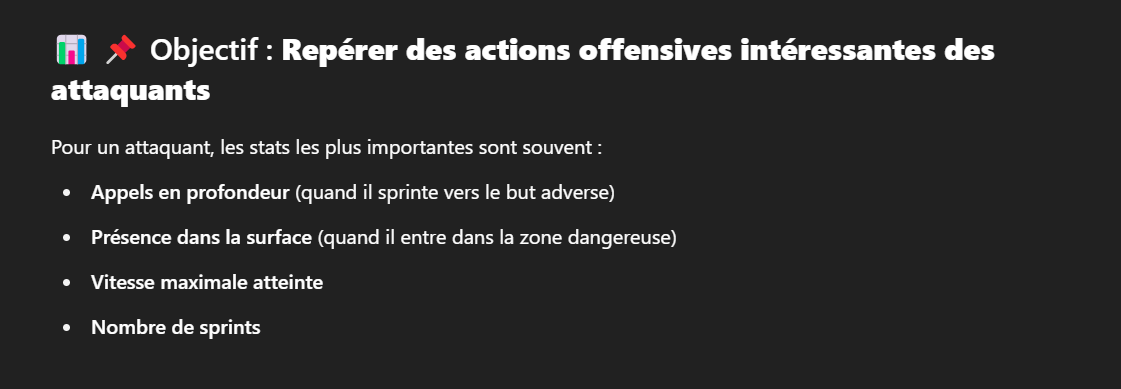

In [332]:
merged_df.head()


,player_id,frame_num,bbox_x1,bbox_y1,bbox_x2,bbox_y2,position_x,position_y,team_color,team,...,total,dominant_zone,prev_x,prev_y,prev_frame,frame_diff,distance,speed,distance_meters,speed_mps
0,1,0,852.499329,633.650208,898.424744,719.967773,875,719,[ 141.53 228.33 182],2,...,100.0,midfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,852.492188,633.639465,898.464844,719.968506,875,719,[ 141.53 228.33 182],2,...,100.0,midfield,875.0,719.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000
2,1,2,861.550232,634.609375,904.032166,723.643677,882,723,[ 141.53 228.33 182],2,...,100.0,midfield,875.0,719.0,1.0,1.0,8.062258,201.556444,0.080623,2.015564
3,1,3,872.893433,637.160156,908.789062,724.422180,890,724,[ 141.53 228.33 182],2,...,100.0,midfield,882.0,723.0,2.0,1.0,8.062258,201.556444,0.080623,2.015564
4,1,4,880.807495,639.302429,914.285217,723.016052,897,723,[ 141.53 228.33 182],2,...,100.0,midfield,890.0,724.0,3.0,1.0,7.071068,176.776695,0.070711,1.767767


In [333]:
# je vais selectionner les attackants:
attack_players = merged_df[merged_df['dominant_zone'] == 'attack']



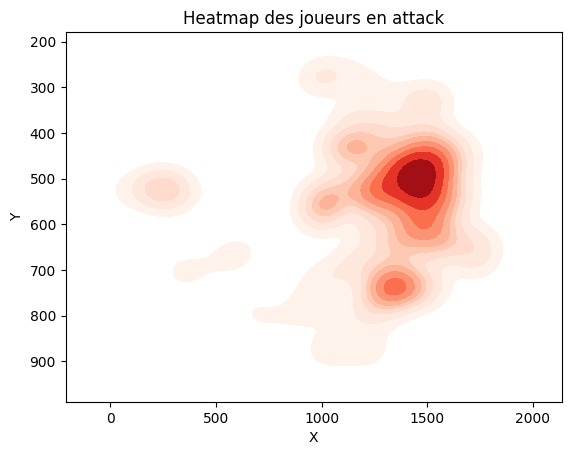

In [334]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(
    x=attack_players['position_x'],
    y=attack_players['position_y'],
    fill=True, cmap='Reds', thresh=0.05
)
plt.title("Heatmap des joueurs en attack")
plt.xlabel("X")
plt.ylabel("Y")
plt.gca().invert_yaxis()
plt.show()


In [335]:
#les seuils:
speed_threshold = 100  # vitesse minimale pour un appel
surface_x_threshold = 850  # position_x minimale proche du but


3️⃣ Chercher les frames où :
il est rapide (speed > 100)

et il est proche du but adverse (position_x > 850)

In [336]:
deep_runs = attack_players[
    (attack_players['speed'] > speed_threshold) &
    (attack_players['position_x'] > surface_x_threshold)
]


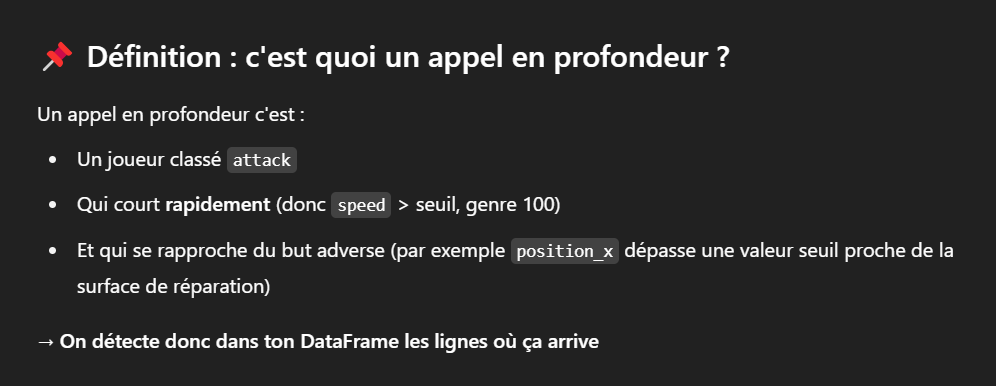

In [337]:
deep_runs_count = deep_runs.groupby('player_id').size().reset_index(name='num_deep_runs')
print(deep_runs_count)



   player_id  num_deep_runs
0          7             98
1          8             90
2         13            134
3         15             99
4         16            158
5         18            199
6         20            146
7         21             42
8         22            138


In [338]:
#Vitesse max atteinte


max_speed_per_attacker = attack_players.groupby('player_id')['distance_meters'].max().reset_index(name='max_speed')

max_speed_per_attacker

,player_id,max_speed
0,7,0.230868
1,8,5.738101
2,13,3.537259
3,15,13.640652
4,16,1.363121
5,18,7.998825
6,20,6.191123
7,21,14.430780
8,22,5.785646


In [339]:
# Nombre de sprints (speed > 150 par exemple)
num_sprints = attack_players[attack_players['speed_mps'] > 2].groupby('player_id').size().reset_index(name='num_sprints')

num_sprints

,player_id,num_sprints
0,7,22
1,8,38
2,13,15
3,15,27
4,16,43
5,18,77
6,20,62
7,21,46
8,22,38


In [340]:
import pandas as pd

# Définir le seuil de la surface (à adapter selon ton terrain)
surface_x_threshold = 900  # à ajuster selon ton cas

# Filtrer les attaquants
attack_players = merged_df[merged_df['dominant_zone'] == 'attack']

# Filtrer les positions dans la surface adverse
in_box = attack_players[attack_players['position_x'] > surface_x_threshold]

# Calculer le nombre de frames passées dans la surface pour chaque attaquant
time_in_box = in_box.groupby('player_id')['frame_num'].count().reset_index(name='frames_in_box')

# Optionnel : convertir en secondes si tu connais le fps (par exemple 25 fps)
fps = 25
time_in_box['time_in_box_seconds'] = time_in_box['frames_in_box'] / fps

# Résultat
print(time_in_box)



   player_id  frames_in_box  time_in_box_seconds
0          7            514                20.56
1          8            418                16.72
2         13            511                20.44
3         15            471                18.84
4         16            590                23.60
5         18            689                27.56
6         20            512                20.48
7         21            249                 9.96
8         22            502                20.08


In [341]:
distance_parcourue = attack_players.groupby('player_id')['distance_meters'].sum().reset_index(name='distance_totale')
distance_parcourue


,player_id,distance_totale
0,7,14.096064
1,8,49.979562
2,13,19.403089
3,15,64.929720
4,16,40.340589
5,18,34.358769
6,20,275.395689
7,21,202.886489
8,22,83.972664


In [342]:
merged_df.columns
merged_df.head()

,player_id,frame_num,bbox_x1,bbox_y1,bbox_x2,bbox_y2,position_x,position_y,team_color,team,...,total,dominant_zone,prev_x,prev_y,prev_frame,frame_diff,distance,speed,distance_meters,speed_mps
0,1,0,852.499329,633.650208,898.424744,719.967773,875,719,[ 141.53 228.33 182],2,...,100.0,midfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,852.492188,633.639465,898.464844,719.968506,875,719,[ 141.53 228.33 182],2,...,100.0,midfield,875.0,719.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000
2,1,2,861.550232,634.609375,904.032166,723.643677,882,723,[ 141.53 228.33 182],2,...,100.0,midfield,875.0,719.0,1.0,1.0,8.062258,201.556444,0.080623,2.015564
3,1,3,872.893433,637.160156,908.789062,724.422180,890,724,[ 141.53 228.33 182],2,...,100.0,midfield,882.0,723.0,2.0,1.0,8.062258,201.556444,0.080623,2.015564
4,1,4,880.807495,639.302429,914.285217,723.016052,897,723,[ 141.53 228.33 182],2,...,100.0,midfield,890.0,724.0,3.0,1.0,7.071068,176.776695,0.070711,1.767767


In [343]:
attack_players = merged_df[merged_df['dominant_zone'] == 'attack']
attack_players




,player_id,frame_num,bbox_x1,bbox_y1,bbox_x2,bbox_y2,position_x,position_y,team_color,team,...,total,dominant_zone,prev_x,prev_y,prev_frame,frame_diff,distance,speed,distance_meters,speed_mps
4035,7,0,1278.082153,390.203888,1306.076416,461.995056,1292,461,[ 141.53 228.33 182],2,...,100.0,attack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4036,7,1,1278.073364,390.210571,1306.066528,462.009521,1292,462,[ 141.53 228.33 182],2,...,100.0,attack,1292.0,461.0,0.0,1.0,1.000000,25.000000,0.010000,0.250000
4037,7,2,1280.472412,390.723450,1309.271973,461.521179,1294,461,[ 141.53 228.33 182],2,...,100.0,attack,1292.0,462.0,1.0,1.0,2.236068,55.901699,0.022361,0.559017
4038,7,3,1280.273804,390.166718,1311.083496,464.289368,1295,464,[ 141.53 228.33 182],2,...,100.0,attack,1294.0,461.0,2.0,1.0,3.162278,79.056942,0.031623,0.790569
4039,7,4,1280.792725,389.971436,1312.744995,464.584167,1296,464,[ 141.53 228.33 182],2,...,100.0,attack,1295.0,464.0,3.0,1.0,1.000000,25.000000,0.010000,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13490,22,745,1369.353760,471.020233,1400.570068,528.048157,1384,528,[ 227.57 228.08 218.05],1,...,100.0,attack,1382.0,527.0,744.0,1.0,2.236068,55.901699,0.022361,0.559017
13491,22,746,1370.637573,471.625031,1403.629517,529.413818,1387,529,[ 227.57 228.08 218.05],1,...,100.0,attack,1384.0,528.0,745.0,1.0,3.162278,79.056942,0.031623,0.790569
13492,22,747,1372.499390,472.387878,1405.814575,528.831299,1389,528,[ 227.57 228.08 218.05],1,...,100.0,attack,1387.0,529.0,746.0,1.0,2.236068,55.901699,0.022361,0.559017
13493,22,748,1376.767578,473.970001,1405.663086,528.256165,1391,528,[ 227.57 228.08 218.05],1,...,100.0,attack,1389.0,528.0,747.0,1.0,2.000000,50.000000,0.020000,0.500000


In [344]:
print(attack_players[['ball_pos_x', 'ball_pos_y']].isna().sum())


ball_pos_x    3690
ball_pos_y    3690
dtype: int64


In [345]:
frames_with_ball = merged_df.dropna(subset=['ball_pos_x', 'ball_pos_y'])['frame_num'].nunique()
total_frames = merged_df['frame_num'].nunique()

print(f"{frames_with_ball} frames avec ballon sur {total_frames} frames au total")




164 frames avec ballon sur 750 frames au total


In [346]:
frames_with_ball = merged_df.dropna(subset=['ball_pos_x', 'ball_pos_y'])['frame_num'].unique()

attack_players_with_ball = attack_players[attack_players['frame_num'].isin(frames_with_ball)]

print(f"Nb de joueurs en attaque dans des frames avec ballon : {len(attack_players_with_ball)}")


Nb de joueurs en attaque dans des frames avec ballon : 1073


In [347]:
speed_above_10 = attack_players_with_ball[attack_players_with_ball['speed_mps'] > 10]
print(f"Nb avec speed > 10 : {len(speed_above_10)}")

in_attack_zone = attack_players_with_ball[attack_players_with_ball['position_x'] > 500]
print(f"Nb en zone position_x > 500 : {len(in_attack_zone)}")

near_ball_x = attack_players_with_ball[abs(attack_players_with_ball['position_x'] - attack_players_with_ball['ball_pos_x']) < 5]
print(f"Nb proche du ballon (x) : {len(near_ball_x)}")

near_ball_y = attack_players_with_ball[abs(attack_players_with_ball['position_y'] - attack_players_with_ball['ball_pos_y']) < 5]
print(f"Nb proche du ballon (y) : {len(near_ball_y)}")



Nb avec speed > 10 : 30
Nb en zone position_x > 500 : 1034
Nb proche du ballon (x) : 1
Nb proche du ballon (y) : 40


In [348]:
# Modifier la proximité du ballon à 10 pixels et une vitesse à partir de 5 m/s
shots_df = attack_players_with_ball[
    (attack_players_with_ball['speed_mps'] > 5) &
    (attack_players_with_ball['position_x'] > 500) &
    (abs(attack_players_with_ball['position_x'] - attack_players_with_ball['ball_pos_x']) < 200) &
    (abs(attack_players_with_ball['position_y'] - attack_players_with_ball['ball_pos_y']) < 200)
]

print(f"Nombre d'attaquants ayant tiré après ajustements : {len(shots_df)}")

print(f"Nombre d'attaquants ayant tiré dans les frames avec ballon : {len(shots_df)}")


Nombre d'attaquants ayant tiré après ajustements : 12
Nombre d'attaquants ayant tiré dans les frames avec ballon : 12


In [349]:
# Compter le nombre de tirs par joueur
shots_per_player = shots_df.groupby('player_id').size()

# Afficher le nombre de tirs par joueur
print(shots_per_player)


player_id
8     2
15    1
16    1
20    2
21    1
22    5
dtype: int64


# resultat des attackant

In [350]:
final_df = deep_runs_count.merge(max_speed_per_attacker, on='player_id', how='outer') \
                          .merge(num_sprints, on='player_id', how='outer') \
                          .merge(time_in_box, on='player_id', how='outer') \
                          .merge(distance_parcourue, on='player_id', how='outer')
                            


# (Optional) Replace NaNs with 0 if necessary
final_df.fillna(0, inplace=True)
final_df.tail()

,player_id,num_deep_runs,max_speed,num_sprints,frames_in_box,time_in_box_seconds,distance_totale
4,16,158,1.363121,43,590,23.60,40.340589
5,18,199,7.998825,77,689,27.56,34.358769
6,20,146,6.191123,62,512,20.48,275.395689
7,21,42,14.430780,46,249,9.96,202.886489
8,22,138,5.785646,38,502,20.08,83.972664


In [351]:
# Compter le nombre de tirs pour chaque joueur
shots_count = shots_df.groupby('player_id').size().reset_index(name='shots_count')
# Fusionner final_df avec les données de shots_count
final_df = final_df.merge(shots_count, on='player_id', how='left')

final_df

,player_id,num_deep_runs,max_speed,num_sprints,frames_in_box,time_in_box_seconds,distance_totale,shots_count
0,7,98,0.230868,22,514,20.56,14.096064,NaN
1,8,90,5.738101,38,418,16.72,49.979562,2.0
2,13,134,3.537259,15,511,20.44,19.403089,NaN
3,15,99,13.640652,27,471,18.84,64.929720,1.0
4,16,158,1.363121,43,590,23.60,40.340589,1.0
5,18,199,7.998825,77,689,27.56,34.358769,NaN
6,20,146,6.191123,62,512,20.48,275.395689,2.0
7,21,42,14.430780,46,249,9.96,202.886489,1.0
8,22,138,5.785646,38,502,20.08,83.972664,5.0


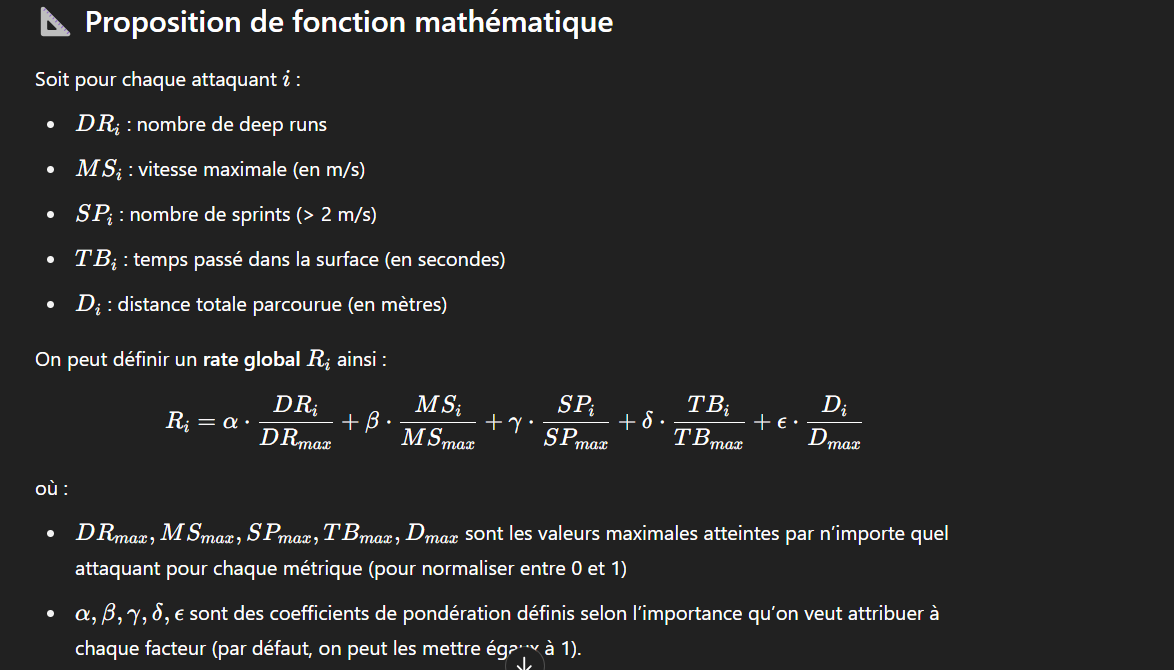

In [352]:
# Normalisation par le maximum
final_df['deep_runs_norm'] = final_df['num_deep_runs'] / final_df['num_deep_runs'].max()
final_df['max_speed_norm'] = final_df['max_speed'] / final_df['max_speed'].max()
final_df['num_sprints_norm'] = final_df['num_sprints'] / final_df['num_sprints'].max()
final_df['time_in_box_norm'] = final_df['time_in_box_seconds'] / final_df['time_in_box_seconds'].max()
final_df['distance_norm'] = final_df['distance_totale'] / final_df['distance_totale'].max()
final_df['shots'] = final_df['shots_count'] / final_df['shots_count'].max()

# Coefficients de pondération
alpha = 0.1  # Deep Runs
beta = 0.3   # Max Speed
gamma = 0.2 # Sprints
delta = 0.3 # Time in Box
epsilon = 0.2 # Distance Parcourue
g=0.2

final_df['rate_global'] = ((
    alpha * final_df['deep_runs_norm'] +
    beta * final_df['max_speed_norm'] +
    gamma * final_df['num_sprints_norm'] +
    delta * final_df['time_in_box_norm'] +
    g * final_df['shots'] +
    epsilon * final_df['distance_norm'])*10
)
final_df.loc[final_df['rate_global']<4,"rate_global"]==4

final_df[['player_id', 'rate_global']].sort_values(by='rate_global', ascending=False)



,player_id,rate_global
6,20,8.660442
8,22,7.678862
7,21,7.363458
3,15,6.956863
1,8,5.615157
4,16,5.456136
0,7,NaN
2,13,NaN
5,18,NaN


# defender statistics

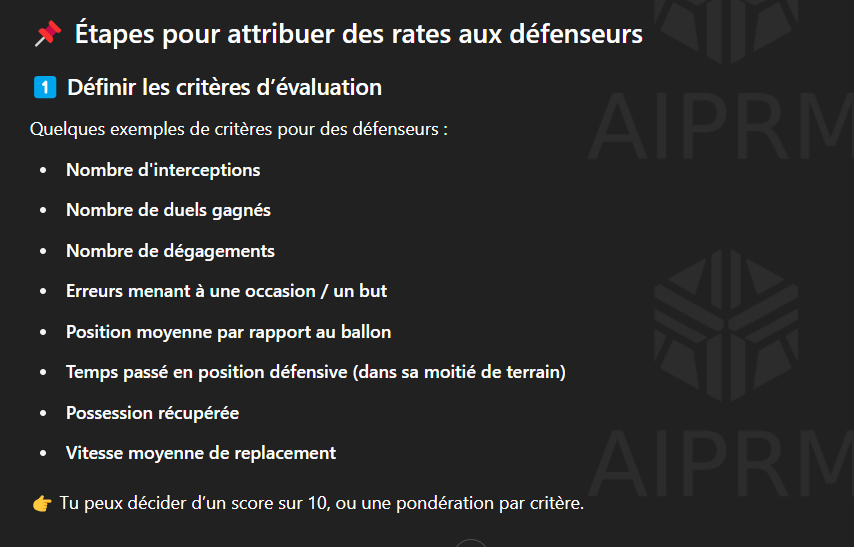

In [398]:
defender_players = merged_df[merged_df['dominant_zone'] == 'defense']



In [399]:
team1_def = defender_players[defender_players['team'] == 1]
team2_def = defender_players[defender_players['team'] == 2]


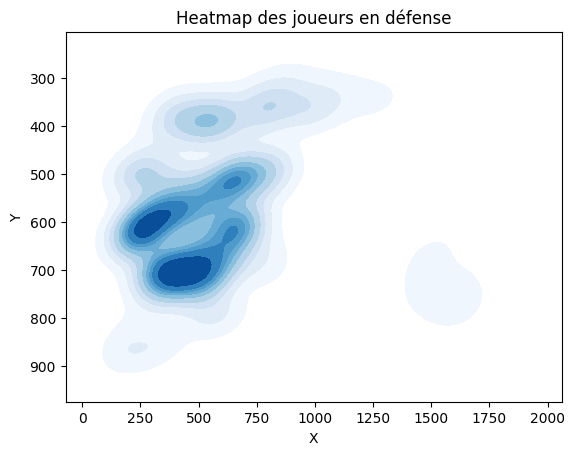

In [400]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(
    x=defender_players['position_x'],
    y=defender_players['position_y'],
    fill=True, cmap='Blues', thresh=0.05
)
plt.title("Heatmap des joueurs en défense")
plt.xlabel("X")
plt.ylabel("Y")
plt.gca().invert_yaxis()
plt.show()


In [401]:
defender_players.head()

,player_id,frame_num,bbox_x1,bbox_y1,bbox_x2,bbox_y2,position_x,position_y,team_color,team,...,total,dominant_zone,prev_x,prev_y,prev_frame,frame_diff,distance,speed,distance_meters,speed_mps
464,2,0,535.304871,686.074402,577.785889,784.134155,556,784,[ 141.53 228.33 182],2,...,100.0,defense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
465,2,1,535.184937,686.062866,577.806519,784.082153,556,784,[ 141.53 228.33 182],2,...,100.0,defense,556.0,784.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000
466,2,2,536.692078,687.106384,577.893188,785.190491,557,785,[ 141.53 228.33 182],2,...,100.0,defense,556.0,784.0,1.0,1.0,1.414214,35.355339,0.014142,0.353553
467,2,3,537.942993,687.274902,578.071289,785.622864,558,785,[ 141.53 228.33 182],2,...,100.0,defense,557.0,785.0,2.0,1.0,1.000000,25.000000,0.010000,0.250000
468,2,4,537.898865,687.777161,577.879578,785.298035,557,785,[ 141.53 228.33 182],2,...,100.0,defense,558.0,785.0,3.0,1.0,1.000000,25.000000,0.010000,0.250000


In [402]:
avg_speed = defender_players.groupby("player_id")["speed_mps"].mean()
avg_speed.reset_index()


,player_id,speed_mps
0,2,0.699400
1,3,0.802006
2,5,0.787111
3,6,0.758037
4,9,5.888377
5,12,20.078604


In [403]:
defender_players.columns

Index(['player_id', 'frame_num', 'bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2',
       'position_x', 'position_y', 'team_color', 'team', 'confidence',
       'ball_pos_x', 'ball_pos_y', 'zone', 'attack', 'defense', 'midfield',
       'total', 'dominant_zone', 'prev_x', 'prev_y', 'prev_frame',
       'frame_diff', 'distance', 'speed', 'distance_meters', 'speed_mps'],
      dtype='object')

In [404]:
avg_speed = defender_players.groupby("player_id")["speed_mps"].mean()
avg_speed.reset_index()

,player_id,speed_mps
0,2,0.699400
1,3,0.802006
2,5,0.787111
3,6,0.758037
4,9,5.888377
5,12,20.078604


In [405]:
total_distance = defender_players.groupby("player_id")["distance_meters"].sum()
total_distance.reset_index()


,player_id,distance_meters
0,2,18.398137
1,3,23.941298
2,5,23.481492
3,6,22.920110
4,9,128.992336
5,12,509.245597


In [406]:
defensive_time = defender_players[defender_players["dominant_zone"] == "defense"] \
                   .groupby("player_id").size()

defensive_time.reset_index()

,player_id,0
0,2,631
1,3,740
2,5,744
3,6,743
4,9,502
5,12,603


In [407]:
avg_pos_x = defender_players.groupby("player_id")["position_x"].mean()
avg_pos_y = defender_players.groupby("player_id")["position_y"].mean()
avg_pos_x, avg_pos_y.dataframe = pd.DataFrame(avg_pos_x), pd.DataFrame(avg_pos_y)
avg_pos = pd.concat([avg_pos_x, avg_pos_y], axis=1)
avg_pos

,position_x,position_y
player_id,,
2,556.000000,676.198098
3,492.221622,573.010811
5,485.579301,577.715054
6,407.306864,726.292059
9,590.832669,430.591633
12,904.127695,456.525705


In [408]:
print(type(avg_speed))
print(type(total_distance))
print(type(defensive_time))


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [409]:
defender_players.head()

,player_id,frame_num,bbox_x1,bbox_y1,bbox_x2,bbox_y2,position_x,position_y,team_color,team,...,total,dominant_zone,prev_x,prev_y,prev_frame,frame_diff,distance,speed,distance_meters,speed_mps
464,2,0,535.304871,686.074402,577.785889,784.134155,556,784,[ 141.53 228.33 182],2,...,100.0,defense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
465,2,1,535.184937,686.062866,577.806519,784.082153,556,784,[ 141.53 228.33 182],2,...,100.0,defense,556.0,784.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000
466,2,2,536.692078,687.106384,577.893188,785.190491,557,785,[ 141.53 228.33 182],2,...,100.0,defense,556.0,784.0,1.0,1.0,1.414214,35.355339,0.014142,0.353553
467,2,3,537.942993,687.274902,578.071289,785.622864,558,785,[ 141.53 228.33 182],2,...,100.0,defense,557.0,785.0,2.0,1.0,1.000000,25.000000,0.010000,0.250000
468,2,4,537.898865,687.777161,577.879578,785.298035,557,785,[ 141.53 228.33 182],2,...,100.0,defense,558.0,785.0,3.0,1.0,1.000000,25.000000,0.010000,0.250000


In [410]:
import pandas as pd
import numpy as np

def detect_interceptions(df, min_speed_change=0.4, max_distance=1.5, min_direction_change=30):

    df = df.copy()
    
    # Clean column names by stripping whitespace
    df.columns = df.columns.str.strip()
    
    # 1. Calculate direction change (in degrees)
    df['direction'] = np.degrees(np.arctan2(df['position_y'].diff(), df['position_x'].diff()))
    df['direction_change'] = df['direction'].diff().abs()
    
    # 2. Identify lateral accelerations (typical of interceptions)
    df['speed_change'] = df['speed_mps'].diff().abs()
    
    # 3. Combined criteria for interception
    df['interception'] = (
        (df['direction_change'] > min_direction_change) &    # Significant direction change
        (df['speed_change'] > min_speed_change) &           # Sudden acceleration
        (df['distance_meters'].shift(-1) < max_distance) &  # Little movement after
        (df['dominant_zone'] == 'defense')                  # In defensive zone
    )
    
    return df[df['interception']]

      player_id  frame_num  direction_change  speed_mps
471           2          7         90.000000   0.000000
488           2         24        135.000000   0.559017
489           2         25        146.309932   2.015564
491           2         55        169.389284   2.610077
493           2         57         74.054604   0.250000
...         ...        ...               ...        ...
7608         12        739        165.963757   0.500000
7609         12        740         51.170175  13.157697
7610         12        741         96.170175   0.707107
7612         12        743         39.667841  13.315874
7613         12        744         95.332159   0.353553

[764 rows x 4 columns]


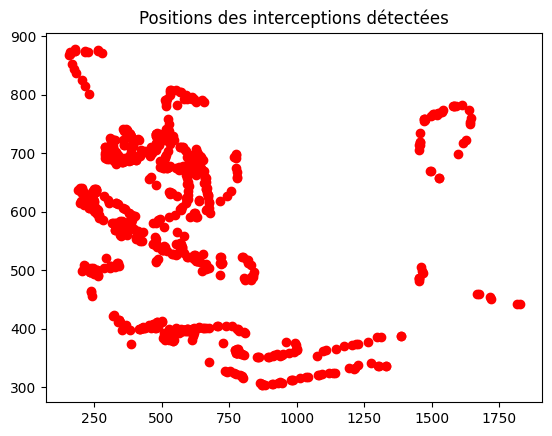

In [411]:
interceptions = detect_interceptions(defender_players)
print(interceptions[['player_id', 'frame_num', 'direction_change', 'speed_mps']])

# Visualiser les positions des interceptions
import matplotlib.pyplot as plt
plt.scatter(interceptions['position_x'], interceptions['position_y'], c='red', label='Interception')
plt.title('Positions des interceptions détectées')
plt.show()

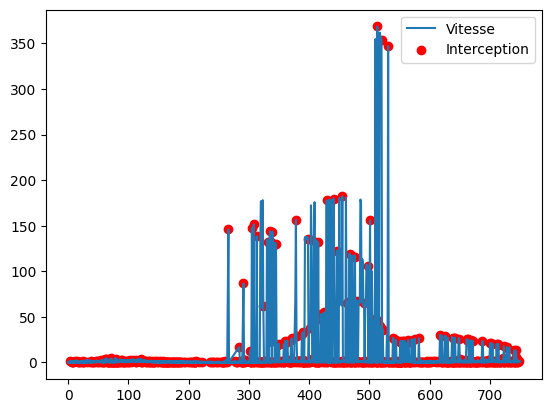

In [412]:
# Tracer la vitesse et les interceptions détectées
plt.plot(defender_players['frame_num'], defender_players['speed_mps'], label='Vitesse')
plt.scatter(interceptions['frame_num'], interceptions['speed_mps'], c='red', label='Interception')
plt.legend()
plt.show()

In [413]:
interceptions[['player_id', 'frame_num', 'direction_change', 'speed_mps']]


,player_id,frame_num,direction_change,speed_mps
471,2,7,90.000000,0.000000
488,2,24,135.000000,0.559017
489,2,25,146.309932,2.015564
491,2,55,169.389284,2.610077
493,2,57,74.054604,0.250000
...,...,...,...,...
7608,12,739,165.963757,0.500000
7609,12,740,51.170175,13.157697
7610,12,741,96.170175,0.707107
7612,12,743,39.667841,13.315874


In [414]:
defender_players.tail()

,player_id,frame_num,bbox_x1,bbox_y1,bbox_x2,bbox_y2,position_x,position_y,team_color,team,...,total,dominant_zone,prev_x,prev_y,prev_frame,frame_diff,distance,speed,distance_meters,speed_mps
7614,12,745,538.093384,341.820038,553.259827,378.797363,545,378,[ 141.53 228.33 182],2,...,100.0,defense,544.0,379.0,744.0,1.0,1.414214,35.355339,0.014142,0.353553
7615,12,746,537.828125,341.724091,555.257080,378.371094,546,378,[ 141.53 228.33 182],2,...,100.0,defense,545.0,378.0,745.0,1.0,1.000000,25.000000,0.010000,0.250000
7616,12,747,538.901428,339.841034,559.471863,378.373840,549,378,[ 141.53 228.33 182],2,...,100.0,defense,546.0,378.0,746.0,1.0,3.000000,75.000000,0.030000,0.750000
7617,12,748,539.974792,339.968811,562.123413,378.266968,551,378,[ 141.53 228.33 182],2,...,100.0,defense,549.0,378.0,747.0,1.0,2.000000,50.000000,0.020000,0.500000
7618,12,749,540.097778,339.982910,563.063232,376.720093,551,376,[ 141.53 228.33 182],2,...,100.0,defense,551.0,378.0,748.0,1.0,2.000000,50.000000,0.020000,0.500000


In [415]:

# Moyenne de la vitesse
if isinstance(avg_speed, pd.Series):
    avg_speed = avg_speed.reset_index()
    avg_speed.columns = ["player_id", "avg_speed"]

# Distance totale parcourue
if isinstance(total_distance, pd.Series):
    total_distance = total_distance.reset_index()
    total_distance.columns = ["player_id", "total_distance"]

# Temps défensif
if isinstance(defensive_time, pd.Series):
    defensive_time = defensive_time.reset_index()
    defensive_time.columns = ["player_id", "defensive_time"]


# Position moyenne
if isinstance(avg_pos, pd.Series):
    avg_pos = avg_pos.reset_index()
    avg_pos.columns = ["player_id", "avg_pos"]


s=interceptions[['player_id','speed_mps']]
if isinstance(s, pd.Series):
    s= s.reset_index()
    s.columns = ["player_id", "speed_mps"]

c=interceptions[['player_id', 'direction_change']]
# Position moyenne
if isinstance(c, pd.Series):
    c = c.reset_index()
    c.columns = ["player_id", "direction_change"]

# Fusion finale des DataFrames
final_df1 = (
    avg_speed
    .merge(total_distance, on="player_id", how="outer")
    .merge(defensive_time, on="player_id", how="outer")
    .merge(avg_pos, on="player_id", how="outer")
    .merge(s, on="player_id", how="outer")
    .merge(c,on="player_id",how="outer")
)

final_df1


,player_id,avg_speed,total_distance,defensive_time,position_x,position_y,speed_mps,direction_change
0,2,0.699400,18.398137,631,556.000000,676.198098,0.000000,90.000000
1,2,0.699400,18.398137,631,556.000000,676.198098,0.000000,135.000000
2,2,0.699400,18.398137,631,556.000000,676.198098,0.000000,146.309932
3,2,0.699400,18.398137,631,556.000000,676.198098,0.000000,169.389284
4,2,0.699400,18.398137,631,556.000000,676.198098,0.000000,74.054604
...,...,...,...,...,...,...,...,...
109241,12,20.078604,509.245597,603,904.127695,456.525705,0.353553,165.963757
109242,12,20.078604,509.245597,603,904.127695,456.525705,0.353553,51.170175
109243,12,20.078604,509.245597,603,904.127695,456.525705,0.353553,96.170175
109244,12,20.078604,509.245597,603,904.127695,456.525705,0.353553,39.667841


# rate for defenders

In [416]:
# Remplacement des NaN par 0 avant normalisation
final_df1['defensive_time'] = final_df1['defensive_time'].fillna(0)
final_df1['total_distance'] = final_df1['total_distance'].fillna(0)
final_df1['speed_mps'] = final_df1['speed_mps'].fillna(0)
final_df1['direction_change'] = final_df1['direction_change'].fillna(0)

# Normalisation
final_df1['defensive_time_norm'] = final_df1['defensive_time'] / final_df1['defensive_time'].max()
final_df1['distance_norm'] = final_df1['total_distance'] / final_df1['total_distance'].max()
final_df1['speed_norm'] = final_df1['speed_mps'] / final_df1['speed_mps'].max()
final_df1['direction_change_norm'] = final_df1['direction_change'] / final_df1['direction_change'].max()

# Pondérations
a = 0.3  
b = 0.3  
c = 0.2  
d = 0.1  
e = 0.1  

# Calcul du score
final_df1['rate_defenseur'] = (( 
    a * final_df1['defensive_time_norm'] + 
    b * final_df1['distance_norm'] +
    c * final_df1['speed_norm'] +
    d * final_df1['direction_change_norm'] ) * 10)

# Affichage trié
final_df1[['player_id', 'rate_defenseur']].sort_values(by='rate_defenseur', ascending=False)

,player_id,rate_defenseur
86076,12,7.421079
85986,12,7.418636
86071,12,7.417720
86068,12,7.414774
85953,12,7.414472
...,...,...
8434,2,2.739039
87,2,2.739039
8407,2,2.739039
8404,2,2.739039


In [417]:
moyennes_par_joueur = (
    final_df1.groupby('player_id', as_index=False)['rate_defenseur']
    .mean()
    .sort_values(by='rate_defenseur', ascending=False)
)

moyennes_par_joueur


,player_id,rate_defenseur
5,12,6.062214
2,5,3.536500
3,6,3.518591
1,3,3.497312
4,9,3.358832
0,2,3.067346


# midfielder statistics

In [418]:
midfielder_players = merged_df[merged_df['dominant_zone'] == 'midfield']
midfielder_players.head()


,player_id,frame_num,bbox_x1,bbox_y1,bbox_x2,bbox_y2,position_x,position_y,team_color,team,...,total,dominant_zone,prev_x,prev_y,prev_frame,frame_diff,distance,speed,distance_meters,speed_mps
0,1,0,852.499329,633.650208,898.424744,719.967773,875,719,[ 141.53 228.33 182],2,...,100.0,midfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,852.492188,633.639465,898.464844,719.968506,875,719,[ 141.53 228.33 182],2,...,100.0,midfield,875.0,719.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000
2,1,2,861.550232,634.609375,904.032166,723.643677,882,723,[ 141.53 228.33 182],2,...,100.0,midfield,875.0,719.0,1.0,1.0,8.062258,201.556444,0.080623,2.015564
3,1,3,872.893433,637.160156,908.789062,724.422180,890,724,[ 141.53 228.33 182],2,...,100.0,midfield,882.0,723.0,2.0,1.0,8.062258,201.556444,0.080623,2.015564
4,1,4,880.807495,639.302429,914.285217,723.016052,897,723,[ 141.53 228.33 182],2,...,100.0,midfield,890.0,724.0,3.0,1.0,7.071068,176.776695,0.070711,1.767767


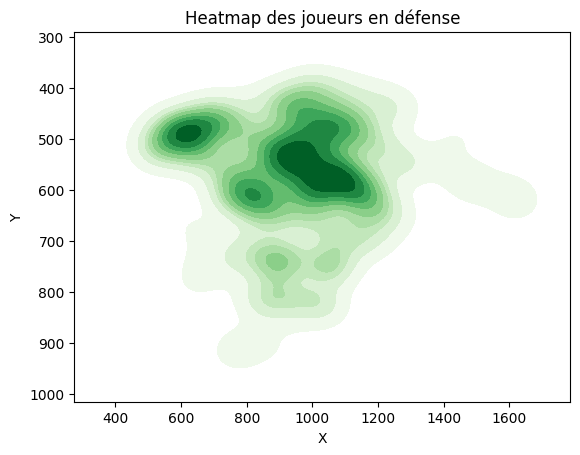

In [419]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(
    x=midfielder_players['position_x'],
    y=midfielder_players['position_y'],
    fill=True, cmap='Greens', thresh=0.05
)
plt.title("Heatmap des joueurs en défense")
plt.xlabel("X")
plt.ylabel("Y")
plt.gca().invert_yaxis()
plt.show()

In [420]:
avg_speed1 = midfielder_players.groupby("player_id")["speed_mps"].mean()
avg_speed1


player_id
1     0.715312
4     0.512193
10    0.966704
11    0.630704
14    0.765431
17    0.589691
19    7.946193
Name: speed_mps, dtype: float64

In [421]:
midfielder_players.columns

Index(['player_id', 'frame_num', 'bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2',
       'position_x', 'position_y', 'team_color', 'team', 'confidence',
       'ball_pos_x', 'ball_pos_y', 'zone', 'attack', 'defense', 'midfield',
       'total', 'dominant_zone', 'prev_x', 'prev_y', 'prev_frame',
       'frame_diff', 'distance', 'speed', 'distance_meters', 'speed_mps'],
      dtype='object')

In [422]:
total_distance = midfielder_players.groupby("player_id")["distance_meters"].sum()
total_distance.reset_index()

,player_id,distance_meters
0,1,26.775323
1,4,15.032342
2,10,28.962445
3,11,18.852133
4,14,22.905030
5,17,17.503007
6,19,229.216492


In [423]:
avg_pos_x = midfielder_players.groupby("player_id")["position_x"].mean()
avg_pos_y = midfielder_players.groupby("player_id")["position_y"].mean()
avg_pos_x, avg_pos_y.dataframe = pd.DataFrame(avg_pos_x), pd.DataFrame(avg_pos_y)
avg_pos = pd.concat([avg_pos_x, avg_pos_y], axis=1)
avg_pos

,position_x,position_y
player_id,,
1,1093.303879,631.741379
4,1019.844320,517.203366
10,944.669333,777.176000
11,850.315789,449.894737
14,887.018742,618.103079
17,777.654167,497.195833
19,1142.375191,589.741194


In [424]:
import pandas as pd



avg_speed = midfielder_players.groupby("player_id")["speed_mps"].mean().reset_index()
avg_speed.rename(columns={"speed_mps": "avg_speed_mps"}, inplace=True)






total_distance = midfielder_players.groupby("player_id")["distance_meters"].sum().reset_index()
total_distance.rename(columns={"distance_meters": "total_distance_m"}, inplace=True)




avg_pos_x = midfielder_players.groupby("player_id")["position_x"].mean().reset_index()
avg_pos_y = midfielder_players.groupby("player_id")["position_y"].mean().reset_index()
avg_pos_x.rename(columns={"position_x": "avg_pos_x"}, inplace=True)
avg_pos_y.rename(columns={"position_y": "avg_pos_y"}, inplace=True)



stats_df = avg_speed.merge(total_distance, on="player_id") \
                    .merge(avg_pos_x, on="player_id") \
                    .merge(avg_pos_y, on="player_id")

stats_df


,player_id,avg_speed_mps,total_distance_m,avg_pos_x,avg_pos_y
0,1,0.715312,26.775323,1093.303879,631.741379
1,4,0.512193,15.032342,1019.844320,517.203366
2,10,0.966704,28.962445,944.669333,777.176000
3,11,0.630704,18.852133,850.315789,449.894737
4,14,0.765431,22.905030,887.018742,618.103079
5,17,0.589691,17.503007,777.654167,497.195833
6,19,7.946193,229.216492,1142.375191,589.741194


In [425]:
midfielder_players.columns

Index(['player_id', 'frame_num', 'bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2',
       'position_x', 'position_y', 'team_color', 'team', 'confidence',
       'ball_pos_x', 'ball_pos_y', 'zone', 'attack', 'defense', 'midfield',
       'total', 'dominant_zone', 'prev_x', 'prev_y', 'prev_frame',
       'frame_diff', 'distance', 'speed', 'distance_meters', 'speed_mps'],
      dtype='object')

In [426]:
import pandas as pd
import numpy as np
from collections import defaultdict


df = midfielder_players.sort_values(by='frame_num')

possession_counter = defaultdict(int)

SEUIL_DISTANCE = 3

frames_uniques = df['frame_num'].unique()

for frame in frames_uniques:
    df_frame = df[df['frame_num'] == frame]

    joueur_proche = None
    distance_min = SEUIL_DISTANCE
    for _, row in df_frame.iterrows():
        dist = row['distance_meters']
        if dist < distance_min:
            distance_min = dist
            joueur_proche = row['player_id']
            
    if joueur_proche is not None:
        possession_counter[joueur_proche] += 1

FPS = 25
possession_en_secondes = {player: count / FPS for player, count in possession_counter.items()}

resultat = pd.DataFrame(list(possession_en_secondes.items()), columns=['player_id', 'temps_de_possession'])
resultat


,player_id,temps_de_possession
0,1,4.20
1,17,4.56
2,4,7.48
3,11,3.60
4,19,3.52
5,14,3.12
6,10,3.48


In [427]:
avg_speed = df.groupby("player_id")["speed_mps"].mean().reset_index(name="vitesse_moyenne")

total_distance = df.groupby("player_id")["distance_meters"].sum().reset_index(name="distance_totale")

avg_pos_x = df.groupby("player_id")["position_x"].mean().reset_index(name="pos_x_moyen")
avg_pos_y = df.groupby("player_id")["position_y"].mean().reset_index(name="pos_y_moyen")

if 'level_0' in resultat.columns:
    resultat = resultat.drop(columns=["level_0"])


In [428]:
stats_df = (
    avg_speed
    .merge(total_distance, on="player_id", how="outer")
    .merge(avg_pos_x, on="player_id", how="outer")
    .merge(avg_pos_y, on="player_id", how="outer")
    .merge(resultat, on="player_id", how="outer")
)


In [429]:
stats_df.head()

,player_id,vitesse_moyenne,distance_totale,pos_x_moyen,pos_y_moyen,temps_de_possession
0,1,0.715312,26.775323,1093.303879,631.741379,4.20
1,4,0.512193,15.032342,1019.844320,517.203366,7.48
2,10,0.966704,28.962445,944.669333,777.176000,3.48
3,11,0.630704,18.852133,850.315789,449.894737,3.60
4,14,0.765431,22.905030,887.018742,618.103079,3.12


In [430]:
midfielder_players.columns

Index(['player_id', 'frame_num', 'bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2',
       'position_x', 'position_y', 'team_color', 'team', 'confidence',
       'ball_pos_x', 'ball_pos_y', 'zone', 'attack', 'defense', 'midfield',
       'total', 'dominant_zone', 'prev_x', 'prev_y', 'prev_frame',
       'frame_diff', 'distance', 'speed', 'distance_meters', 'speed_mps'],
      dtype='object')

In [431]:
midfielder_players.loc[:, 'distance_to_ball'] = np.sqrt((midfielder_players['position_x'] - midfielder_players['ball_pos_x'])**2 + (midfielder_players['position_y'] - midfielder_players['ball_pos_y'])**2)

SEUIL_CONTACT = 2000000

midfielder_players.loc[:, 'is_touch'] = midfielder_players['distance_to_ball'] < SEUIL_CONTACT

midfielder_players.loc[:, 'touch_start'] = midfielder_players.groupby('player_id')['is_touch'].transform(lambda x: x.astype(int).diff().fillna(0) == 1)

touches_par_joueur = midfielder_players[midfielder_players['touch_start']].groupby('player_id').size().reset_index(name='nombre_de_touches')

touches_par_joueur


C:\Users\HP GAMING\AppData\Local\Temp\ipykernel_9252\3744308405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midfielder_players.loc[:, 'distance_to_ball'] = np.sqrt((midfielder_players['position_x'] - midfielder_players['ball_pos_x'])**2 + (midfielder_players['position_y'] - midfielder_players['ball_pos_y'])**2)
C:\Users\HP GAMING\AppData\Local\Temp\ipykernel_9252\3744308405.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midfielder_players.loc[:, 'is_touch'] = midfielder_players['distance_to_bal

,player_id,nombre_de_touches
0,1,48
1,4,69
2,10,70
3,11,69
4,14,69
5,17,70
6,19,55


In [432]:
stats_df = stats_df.merge(touches_par_joueur, on='player_id', how='left')

In [433]:
stats_df.columns

Index(['player_id', 'vitesse_moyenne', 'distance_totale', 'pos_x_moyen',
       'pos_y_moyen', 'temps_de_possession', 'nombre_de_touches'],
      dtype='object')

# Now we are going to give the defenders their rates

In [434]:

# Remplacement des NaN par 0 avant normalisation
stats_df['vitesse_moyenne'] = stats_df['vitesse_moyenne'].fillna(0)
stats_df['distance_totale'] = stats_df['distance_totale'].fillna(0)
stats_df['temps_de_possession'] = stats_df['temps_de_possession'].fillna(0)
stats_df['nombre_de_touches'] = stats_df['nombre_de_touches'].fillna(0)

# Normalisation
stats_df['vitesse_moyenne'] = stats_df['vitesse_moyenne'] / stats_df['vitesse_moyenne'].max()
stats_df['distance_norm'] = stats_df['distance_totale'] / stats_df['distance_totale'].max()
stats_df['temps_de_possession'] = stats_df['temps_de_possession'] / stats_df['temps_de_possession'].max()
stats_df['nombre_de_touches'] = stats_df['nombre_de_touches'] / stats_df['nombre_de_touches'].max()

# Pondérations
a = 0.3  
b = 0.3  
c = 0.2  
d = 0.1  
e = 0.1  

# Calcul du score
stats_df['rate_milieux'] = (( 
    a * stats_df['vitesse_moyenne'] + 
    b * stats_df['distance_norm'] +
    c * stats_df['temps_de_possession'] +
    d * stats_df['nombre_de_touches'] ) * 10)

# Affichage trié
stats_df[['player_id', 'rate_milieux']].sort_values(by='rate_milieux', ascending=False)

,player_id,rate_milieux
6,19,7.726891
1,4,3.375832
2,10,2.674512
5,17,2.670963
3,11,2.433135
0,1,2.429204
4,14,2.408702


In [442]:

df1 = final_df[['player_id', 'rate_global']].sort_values(by='rate_global', ascending=False)
df2 = final_df1[['player_id', 'rate_defenseur']].sort_values(by='rate_defenseur', ascending=False)
df3 = stats_df[['player_id', 'rate_milieux']].sort_values(by='rate_milieux', ascending=False)

merged_df2 = df1.merge(df2, on='player_id', how='outer') \
               .merge(df3, on='player_id', how='outer') 




merged_df2 = merged_df2.drop_duplicates(subset=['player_id'])
merged_df2



,player_id,rate_global,rate_defenseur,rate_milieux
0,1,NaN,NaN,2.429204
1,2,NaN,3.669941,NaN
10817,3,NaN,4.120088,NaN
29586,4,NaN,NaN,3.375832
29587,5,NaN,4.124657,NaN
39788,6,NaN,4.106705,NaN
60524,7,NaN,NaN,NaN
60525,8,5.615157,NaN,NaN
60526,9,NaN,5.772980,NaN
65150,10,NaN,NaN,2.674512


In [443]:
merged_df2.to_csv('merged_data1.csv', index=False)


In [444]:
result = pd.concat([merged_df, merged_df2], axis=0)

In [445]:
result

,player_id,frame_num,bbox_x1,bbox_y1,bbox_x2,bbox_y2,position_x,position_y,team_color,team,...,prev_y,prev_frame,frame_diff,distance,speed,distance_meters,speed_mps,rate_global,rate_defenseur,rate_milieux
0,1,0.0,852.499329,633.650208,898.424744,719.967773,875.0,719.0,[ 141.53 228.33 182],2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.0,852.492188,633.639465,898.464844,719.968506,875.0,719.0,[ 141.53 228.33 182],2.0,...,719.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
2,1,2.0,861.550232,634.609375,904.032166,723.643677,882.0,723.0,[ 141.53 228.33 182],2.0,...,719.0,1.0,1.0,8.062258,201.556444,0.080623,2.015564,NaN,NaN,NaN
3,1,3.0,872.893433,637.160156,908.789062,724.422180,890.0,724.0,[ 141.53 228.33 182],2.0,...,723.0,2.0,1.0,8.062258,201.556444,0.080623,2.015564,NaN,NaN,NaN
4,1,4.0,880.807495,639.302429,914.285217,723.016052,897.0,723.0,[ 141.53 228.33 182],2.0,...,724.0,3.0,1.0,7.071068,176.776695,0.070711,1.767767,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109257,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109258,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.726891
109259,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.660442,NaN,NaN
109260,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.363458,NaN,NaN


In [447]:
result.to_csv('result.csv', index=False)


In [1]:
# === fichier : homographie_creator.py ===
import numpy as np
import cv2 as cv

click_stage = 0
src1_points, dst1_points = [], []
src2_points, dst2_points = [], []

H = {
    "H1": None,
    "H2": None
}

def mouse_callback(event, x, y, flags, param):
    global click_stage

    if event == cv.EVENT_LBUTTONDOWN:
        if click_stage == 0:
            src1_points.append([x, y])
            cv.circle(src1_copy, (x, y), 5, (0, 255, 0), -1)
            print(f"src1 point: {x},{y}")
            click_stage = 1
        elif click_stage == 1:
            dst1_points.append([x, y])
            cv.circle(dst_copy, (x, y), 5, (0, 255, 0), -1)
            print(f"dst for src1 point: {x},{y}")
            click_stage = 2
        elif click_stage == 2:
            src2_points.append([x, y])
            cv.circle(src2_copy, (x, y), 5, (255, 0, 0), -1)
            print(f"src2 point: {x},{y}")
            click_stage = 3
        elif click_stage == 3:
            dst2_points.append([x, y])
            cv.circle(dst_copy, (x, y), 5, (255, 0, 0), -1)
            print(f"dst for src2 point: {x},{y}")
            click_stage = 0

def calculate_and_warp():
    global H

    if len(src1_points) >= 4 and len(dst1_points) >= 4:
        H["H1"], _ = cv.findHomography(np.array(src1_points), np.array(dst1_points), cv.RANSAC)
        warped1 = cv.warpPerspective(src1, H["H1"], (dst.shape[1], dst.shape[0]))
        print("✅ H1 calculée.")
    else:
        warped1 = np.zeros_like(dst)

    if len(src2_points) >= 4 and len(dst2_points) >= 4:
        H["H2"], _ = cv.findHomography(np.array(src2_points), np.array(dst2_points), cv.RANSAC)
        warped2 = cv.warpPerspective(src2, H["H2"], (dst.shape[1], dst.shape[0]))
        print("✅ H2 calculée.")
    else:
        warped2 = np.zeros_like(dst)

    merged = np.maximum(warped1, warped2)
    cv.imshow("Plan Fusionné", merged)

    np.save("homographies.npy", H)
    print("📁 Matrices d'homographie sauvegardées dans 'homographies.npy'")

# Chargement des images
src1 = cv.imread("C:/Users/HP GAMING/Desktop/AI/computer vision/match/input_video/fina1.png")
src2 = cv.imread("C:/Users/HP GAMING/Desktop/AI/computer vision/match/input_video/fina2.png")
dst = cv.imread("C:/Users/HP GAMING/Desktop/AI/computer vision/match/dst.jpg")

src1 = cv.resize(src1, (600, 400))
src2 = cv.resize(src2, (600, 400))
dst = cv.resize(dst, (600, 400))

src1_copy = src1.copy()
src2_copy = src2.copy()
dst_copy = dst.copy()

cv.namedWindow("src1")
cv.setMouseCallback("src1", mouse_callback)
cv.namedWindow("src2")
cv.setMouseCallback("src2", mouse_callback)
cv.namedWindow("dst")
cv.setMouseCallback("dst", mouse_callback)

while True:
    cv.imshow("src1", src1_copy)
    cv.imshow("src2", src2_copy)
    cv.imshow("dst", dst_copy)

    key = cv.waitKey(1) & 0xFF
    if key == ord('h'):
        calculate_and_warp()
    elif key == ord('q'):
        break

cv.destroyAllWindows()
